<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/F4_Nominal_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nominal Data

Nominal data is a type of qualitative data that represents categories or labels without any intrinsic order or ranking. It's the simplest form of data, where values are used to classify or identify items into different groups. These categories cannot be meaningfully ordered, measured, or used in mathematical operations beyond counting the frequency of occurrences within each category.

### Key Characteristics of Nominal Data:

1.  **Categorical:** Nominal data consists of discrete categories.
2.  **No Order:** There is no inherent order or hierarchy among the categories. For example, 'red' is not 'greater' or 'less' than 'blue'.
3.  **No Numerical Meaning:** The numbers, if used to represent categories (e.g., 1 for male, 2 for female), are arbitrary labels and do not carry numerical value or imply any quantitative relationship.
4.  **Mutually Exclusive:** Each data point belongs to one and only one category.
5.  **Exhaustive:** The categories should cover all possible observations.

### Examples of Nominal Data:

*   **Gender:** Male, Female, Non-binary
*   **Marital Status:** Single, Married, Divorced, Widowed
*   **Eye Color:** Blue, Brown, Green, Hazel
*   **Nationality:** American, Canadian, British, Indian
*   **Type of Car:** Sedan, SUV, Truck, Hatchback
*   **Political Party Affiliation:** Democrat, Republican, Independent
*   **City of Birth:** New York, London, Tokyo

### How Nominal Data is Used:

*   **Counting Frequencies:** You can count how many observations fall into each category. For example, how many males vs. females are in a dataset.
*   **Calculating Proportions/Percentages:** You can determine the proportion or percentage of each category relative to the total.
*   **Mode:** The mode (the most frequently occurring category) is the only measure of central tendency that is meaningful for nominal data.
*   **Visualizations:** Bar charts and pie charts are commonly used to visualize nominal data to show the distribution of categories.

### Distinction from Other Data Types:

*   **Ordinal Data:** Unlike nominal data, ordinal data has categories with a meaningful order (e.g., small, medium, large; or satisfaction ratings like poor, fair, good, excellent). However, the differences between ordinal categories are not quantifiable.
*   **Interval Data:** Interval data has ordered categories with meaningful and consistent differences between values, but no true zero point (e.g., temperature in Celsius or Fahrenheit).
*   **Ratio Data:** Ratio data has all the properties of interval data, but also a true zero point, meaning ratios are meaningful (e.g., height, weight, income).

In summary, nominal data is used for labeling variables without any quantitative value, making it fundamental for classification and categorization tasks in data analysis.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
df = pd.read_csv("customer_120_rows.csv")
print(df.head())


   age  gender          review      education purchased
0   58    Male  Will buy again       Graduate       Yes
1   25    Male   Great product  Undergraduate       Yes
2   19  Female   Not satisfied  Undergraduate        No
3   35    Male   Great product       Graduate       Yes
4   33    Male    Disappointed  Undergraduate        No


Select Nominal Feature + Target

In [5]:
X = df[['gender']]
y = df['purchased']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
oe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = oe.fit_transform(X_train)
X_test_encoded = oe.transform(X_test)

print("Encoded Gender:\n", X_train_encoded[:5])


Encoded Gender:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [8]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [9]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train_encoded)


LogisticRegression()

In [10]:
y_pred = model.predict(X_test_encoded)


In [11]:
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.4166666666666667


#Now the REAL Learning – Decision Making
Test 1: Male Customer

In [12]:
new_customer = pd.DataFrame({'gender': ['Male']})
new_encoded = oe.transform(new_customer)

prediction = model.predict(new_encoded)
print("Male Customer Prediction:", prediction)


Male Customer Prediction: [0]


Test 2: Female Customer

In [13]:
new_customer2 = pd.DataFrame({'gender': ['Female']})
new_encoded2 = oe.transform(new_customer2)

prediction2 = model.predict(new_encoded2)
print("Female Customer Prediction:", prediction2)


Female Customer Prediction: [0]


In [15]:
df1=pd.read_csv("cars.csv")

In [16]:
df1.head()

,brand,km_driven,fuel,owner,selling_price
0,Toyota,101659,CNG,Second Owner,1277353
1,Toyota,148759,CNG,Second Owner,393826
2,Honda,189072,CNG,Fourth Owner,828273
3,Kia,100597,Electric,Second Owner,560123
4,Mahindra,153945,CNG,Third Owner,824449


In [18]:
df1['fuel'].unique()

array(['CNG', 'Electric', 'Petrol', 'Diesel'], dtype=object)

In [19]:
df1['fuel'].value_counts()

,count
fuel,
Electric,51
CNG,38
Diesel,38
Petrol,23


In [20]:
df1['owner'].unique()

array(['Second Owner', 'Fourth Owner', 'Third Owner', 'First Owner'],
      dtype=object)

In [21]:
df1['owner'].value_counts()

,count
owner,
Fourth Owner,44
Second Owner,38
Third Owner,34
First Owner,34


In [22]:
df1['brand'].unique()

array(['Toyota', 'Honda', 'Kia', 'Mahindra', 'Ford', 'Maruti', 'Hyundai',
       'Nissan', 'Renault', 'Tata'], dtype=object)

In [23]:
df1['brand'].value_counts()

,count
brand,
Toyota,21
Honda,19
Kia,19
Maruti,18
Nissan,15
Hyundai,13
Renault,13
Ford,11
Tata,11


#OneHotEncoding using Pandas

In [24]:
pd.get_dummies(df1,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Petrol,owner_First Owner,owner_Fourth Owner,owner_Second Owner,owner_Third Owner
0,Toyota,101659,1277353,True,False,False,False,False,False,True,False
1,Toyota,148759,393826,True,False,False,False,False,False,True,False
2,Honda,189072,828273,True,False,False,False,False,True,False,False
3,Kia,100597,560123,False,False,True,False,False,False,True,False
4,Mahindra,153945,824449,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
145,Hyundai,167332,694756,False,True,False,False,False,False,True,False
146,Maruti,183479,676714,False,False,True,False,False,False,True,False
147,Kia,76012,736617,True,False,False,False,False,True,False,False
148,Ford,48518,957203,False,False,False,True,False,False,True,False


In [30]:
import pandas as pd

df1 = pd.read_csv("cars.csv")

df_encoded = pd.get_dummies(df1, columns=['fuel', 'owner'])

print(df_encoded.head())


      brand  km_driven  selling_price  fuel_CNG  fuel_Diesel  fuel_Electric  \
0    Toyota     101659        1277353      True        False          False   
1    Toyota     148759         393826      True        False          False   
2     Honda     189072         828273      True        False          False   
3       Kia     100597         560123     False        False           True   
4  Mahindra     153945         824449      True        False          False   

   fuel_Petrol  owner_First Owner  owner_Fourth Owner  owner_Second Owner  \
0        False              False               False                True   
1        False              False               False                True   
2        False              False                True               False   
3        False              False               False                True   
4        False              False               False               False   

   owner_Third Owner  
0              False  
1              F

In [33]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [34]:
print(df_encoded.head())
print(df_encoded.dtypes)


      brand  km_driven  selling_price  fuel_CNG  fuel_Diesel  fuel_Electric  \
0    Toyota     101659        1277353         1            0              0   
1    Toyota     148759         393826         1            0              0   
2     Honda     189072         828273         1            0              0   
3       Kia     100597         560123         0            0              1   
4  Mahindra     153945         824449         1            0              0   

   fuel_Petrol  owner_First Owner  owner_Fourth Owner  owner_Second Owner  \
0            0                  0                   0                   1   
1            0                  0                   0                   1   
2            0                  0                   1                   0   
3            0                  0                   0                   1   
4            0                  0                   0                   0   

   owner_Third Owner  
0                  0  
1               

#OneHot Encoding Using Scikit Learn

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.iloc[:, 0:4], df1.iloc[:, -1], test_size=0.2, random_state=2
)

In [40]:
X_train.head()

,brand,km_driven,fuel,owner
126,Hyundai,158479,Diesel,Third Owner
23,Toyota,7747,Petrol,Fourth Owner
64,Honda,11940,Electric,Fourth Owner
117,Kia,124243,Diesel,First Owner
84,Renault,166397,Petrol,First Owner


In [41]:
X_test.head()

,brand,km_driven,fuel,owner
6,Toyota,197596,CNG,Fourth Owner
3,Kia,100597,Electric,Second Owner
113,Hyundai,187583,CNG,Second Owner
12,Honda,33998,Diesel,Third Owner
24,Honda,145732,Electric,First Owner


In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(X_train[['fuel', 'owner']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 240 stored elements and shape (120, 8)>

In [43]:
X_train_new = ohe.fit_transform(X_train[['fuel', 'owner']]).toarray()
X_test_new = ohe.transform(X_test[['fuel', 'owner']]).toarray()

In [44]:
X_train_new

array([[0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 

In [45]:
X_train[['brand', 'km_driven']].values

array([['Hyundai', 158479],
       ['Toyota', 7747],
       ['Honda', 11940],
       ['Kia', 124243],
       ['Renault', 166397],
       ['Kia', 109558],
       ['Renault', 34653],
       ['Maruti', 105426],
       ['Hyundai', 38656],
       ['Mahindra', 169178],
       ['Toyota', 149547],
       ['Maruti', 142738],
       ['Hyundai', 141165],
       ['Maruti', 185329],
       ['Ford', 41861],
       ['Honda', 157368],
       ['Tata', 141623],
       ['Renault', 64962],
       ['Toyota', 101659],
       ['Renault', 15778],
       ['Honda', 34069],
       ['Ford', 148982],
       ['Ford', 48518],
       ['Nissan', 157460],
       ['Maruti', 55784],
       ['Honda', 103792],
       ['Honda', 163433],
       ['Toyota', 140568],
       ['Nissan', 110111],
       ['Honda', 152562],
       ['Nissan', 68168],
       ['Honda', 185598],
       ['Toyota', 48607],
       ['Toyota', 53775],
       ['Ford', 83402],
       ['Mahindra', 164551],
       ['Maruti', 139983],
       ['Nissan', 188538],
 

In [47]:
import numpy as np

In [48]:
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new))

array([['Hyundai', 158479, 0.0, ..., 0.0, 0.0, 1.0],
       ['Toyota', 7747, 0.0, ..., 1.0, 0.0, 0.0],
       ['Honda', 11940, 0.0, ..., 1.0, 0.0, 0.0],
       ...,
       ['Maruti', 127285, 0.0, ..., 0.0, 0.0, 0.0],
       ['Toyota', 197877, 0.0, ..., 0.0, 1.0, 0.0],
       ['Mahindra', 94660, 0.0, ..., 1.0, 0.0, 0.0]], dtype=object)

In [49]:
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new)).shape

(120, 10)

🔹 Step 1: Encode fuel + owner

In [50]:
from sklearn.preprocessing import OneHotEncoder

ohe1 = OneHotEncoder(drop='first', sparse_output=False)
X_train_fo = ohe1.fit_transform(X_train[['fuel', 'owner']])
X_test_fo = ohe1.transform(X_test[['fuel', 'owner']])


🔹 Step 2: Encode brand

In [51]:
ohe2 = OneHotEncoder(drop='first', sparse_output=False)
X_train_brand = ohe2.fit_transform(X_train[['brand']])
X_test_brand = ohe2.transform(X_test[['brand']])


🔹 Step 3: Take km_driven

In [52]:
X_train_km = X_train[['km_driven']].values
X_test_km = X_test[['km_driven']].values


🔹 Step 4: Combine All Features

In [53]:
import numpy as np

X_train_final = np.hstack((X_train_brand, X_train_fo, X_train_km))
X_test_final = np.hstack((X_test_brand, X_test_fo, X_test_km))


In [54]:
X_test_final

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.97596e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00597e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.87583e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        3.39980e+04],
       [1.00000e+00, 0.00000e+00, 0.

#Train Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

#Predict on Test Data

In [56]:
y_pred = model.predict(X_test_final)
print("First 5 Predictions",y_pred[:5])

First 5 Predictions [686390.17172387 580174.4054531  642895.55179008 964329.27126315
 912573.07521523]


In [57]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: -0.11549851141983214
MAE: 294025.48371262074


#TEST WITH NEW CAR INPUT (REAL DECISION MAKING)

In [58]:
import pandas as pd

new_car = pd.DataFrame({
    'brand': ['Toyota'],
    'fuel': ['Petrol'],
    'owner': ['First Owner'],
    'km_driven': [45000]
})


Encode New Car

In [59]:
new_car_brand = ohe2.transform(new_car[['brand']])
new_car_fo = ohe1.transform(new_car[['fuel', 'owner']])
new_car_km = new_car[['km_driven']].values


Combine Features

In [60]:
new_car_final = np.hstack((new_car_brand, new_car_fo, new_car_km))


Predict Selling Price

In [62]:
predicted_price = model.predict(new_car_final)

print("Predicted Selling Price:", predicted_price[0])


Predicted Selling Price: 893860.7790665608


#Visualization




In [63]:
# Brand feature names
brand_features = ohe2.get_feature_names_out(['brand'])

# Fuel + Owner feature names
fo_features = ohe1.get_feature_names_out(['fuel', 'owner'])

# Final feature names list (order matters!)
feature_names = list(brand_features) + list(fo_features) + ['km_driven']


In [64]:
coefficients = model.coef_


In [65]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort by absolute importance
importance_df['AbsImportance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='AbsImportance', ascending=False)

print(importance_df.head(10))


               Feature     Importance  AbsImportance
8         brand_Toyota -326617.791243  326617.791243
1        brand_Hyundai -298664.444232  298664.444232
11         fuel_Petrol  272149.119302  272149.119302
2            brand_Kia -218175.138509  218175.138509
5         brand_Nissan -180674.163633  180674.163633
3       brand_Mahindra -178269.210694  178269.210694
7           brand_Tata -177713.057747  177713.057747
6        brand_Renault -158018.081788  158018.081788
13  owner_Second Owner -124898.920142  124898.920142
14   owner_Third Owner  109573.110195  109573.110195


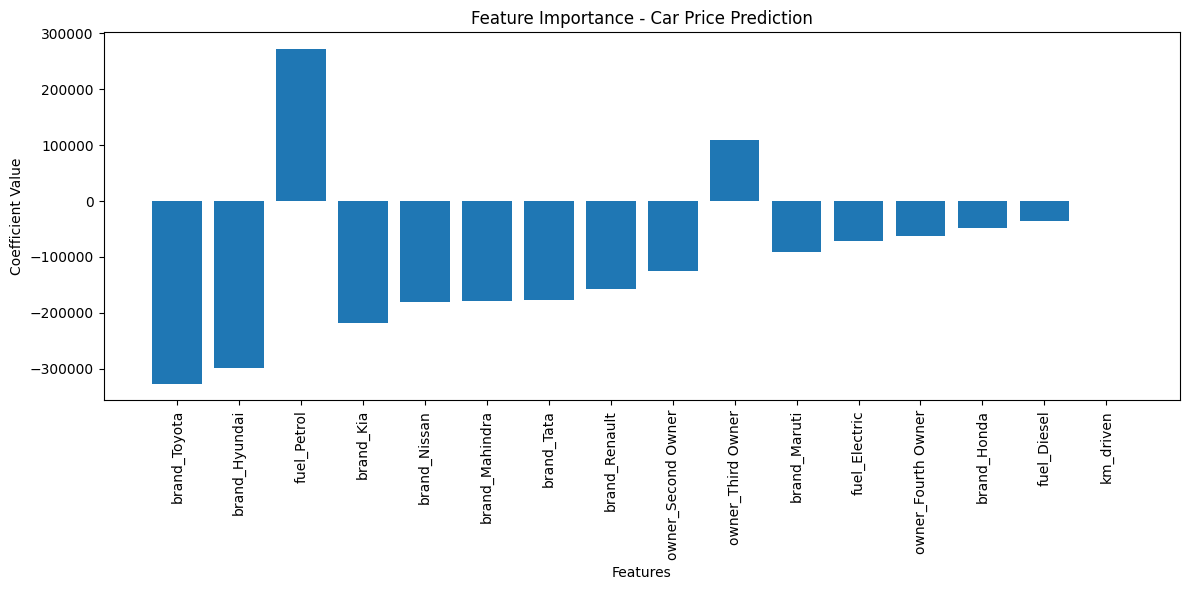

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.title("Feature Importance - Car Price Prediction")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()
